## Observations and Insights 

In [153]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset - by Mouse ID left join due to studing the results
mouse_study_merge = pd.merge(study_results,mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview - provides a table of both by Mouse ID
mouse_study_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [154]:
# Checking the number of mice - gives 249 mice
len(mouse_study_merge["Mouse ID"].unique())


249

In [155]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_id = mouse_study_merge.loc[mouse_study_merge.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice_id


array(['g989'], dtype=object)

In [156]:
# Optional: Get all the data for the duplicate mouse ID. -- need to look at this again
#dup_mice_id = mouse_study_merge.loc[mouse_study_merge["Mouse ID"] == "g898"]
#dup_mice_id

In [157]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_study = mouse_study_merge[mouse_study_merge['Mouse ID'].isin(dup_mice_id)==False]
clean_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [158]:
# Checking the number of mice in the clean DataFrame.
len(clean_study["Mouse ID"].unique())

248

## Summary Statistics

In [159]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


In [160]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# sample from online - candidates_by_month = candidates_df.groupby('month').agg(num_cand_month = ('num_candidates', 'sum'))

tumor_values = clean_study.groupby('Drug Regimen').agg({"Tumor Volume (mm3)": ["mean","median","var","std","sem"]})

#tumor_volume = tumor_values['Tumor Volume (mm3)']
# mean,  
#tumor_mean = tumor_values(['Tumor Volume (mm3)']).mean()

#median, 
#tumor_median = (clean_study.groupby(['Drug Regimen','Timepoint'])['Tumor Volume (mm3)'].median())

#variance, 
#tumor_var = (clean_study.groupby(['Drug Regimen','Timepoint'])['Tumor Volume (mm3)'].var())

#standard deviation, and SEM of the tumor volume.
#tumor_std = (clean_study.groupby(['Drug Regimen','Timepoint'])['Tumor Volume (mm3)'].std())

#mice_scipy = sts.mode(tumor_values['Tumor Volume (mm3)'])
#mice_scipy

#tumor_sem = (clean_study.groupby(['Drug Regimen','Timepoint'])['Tumor Volume (mm3)'].sem())
#tumor_sem

# Assemble the resulting series into a single summary dataframe.
#tumor_summary_df =pd.DataFrame({"Tumor Mean" : [tumor_mean],
#                              "Tumor Median" : [tumor_median],
#                              "Tumor Variance":[tumor_var],
#                              "Tumor Standard Deviation" : [tumor_std],
#                              "Tumor Standar Error of Mean" : [tumor_sem]})

tumor_values

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

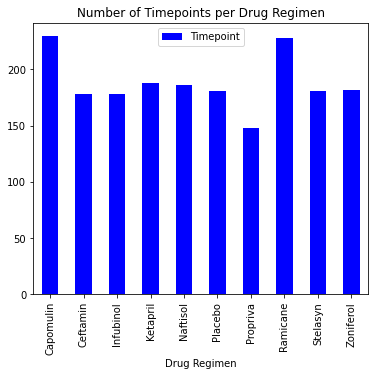

In [173]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#newgroupby with 'Timepoint' and  'Drug Regimen' #count the timepoints for each drug
 
timepoint_pandas = pd.DataFrame(clean_study.groupby(['Drug Regimen'])['Timepoint'].count())
timepoint_pandas


# Use DataFrame.plot() in order to create a bar chart of the data
timepoint_pandas.plot(kind="bar", figsize=(6,5), facecolor= "blue")

# Set a title for the chart
plt.title("Number of Timepoints per Drug Regimen")

plt.show()
#plt.tight_layout()

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

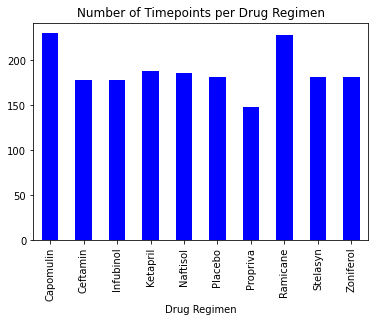

In [119]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#newgroupby with 'Timepoint' and  'Drug Regimen' #count the timepoints for each drug
 
timepoint_values = clean_study.groupby(['Drug Regimen'])['Timepoint'].count()
timepoint_values

#plot in pyplt (df = groupby.plotbar())
time_pyplt = timepoint_values.plot(kind="bar", facecolor= "blue")


#plt title "Number of Timepoints per Drug Regimen"
plt.title("Number of Timepoints per Drug Regimen")
timepoint_values

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
